# Opis wkładu
Każda z nas samodzielnie napisała rozwiązania do zadań projektu. Następnie wymieniłyśmy się kodami i je sprawdziłyśmy.</br>
Katarzyna zidentyfikowała źródło niezgodności rozwiązań, dopracowała ostateczne opisy i interpretacje wyników.</br>
Anastazja poprawiła błąd na podstawie rozwiązania Katarzyny i dopracowała ostateczny kod z rozwiązaniami zadań projektu.

# Mały projekt 1: wizualizacja poziomu zanieczyszczeń (PM2.5)

Główny Inspektorat Ochrony Środowiska (GIOS) udostępnia dane o jakości powietrza w Polsce na stronie [https://powietrze.gios.gov.pl](https://powietrze.gios.gov.pl), tj. poziom stężenia pyłów PM2.5, PM10, SO2 i innych zanieczyszczeń. Dane te są szczególnie przydatne w analizach środowiskowych i zdrowotnych. W tym zadaniu interesują nas godzinne pomiary stężeń drobnego pyłu **PM2.5** (pyłu o średnicy poniżej 2.5 µm) w latach **2014, 2019 i 2024**. Pyły PM2.5 są one bardzo szkodliwe dla zdrowia, gdyż mogąc przenikać głęboko do układu oddechowego i krwiobiegu. Zadanie polega na przeprowadzeniu analizy danych wraz z opisami czynności oraz wykresami.

## Wymagania ogólne

- Rozwiązanie należy przygotować w formie **Jupyter Notebooka (`.ipynb`)**.  Rozwiązanie proszę przesłać przez Moodle’a.
- Wszystkie operacje czyszczenia i łączenia danych wykonaj **programistycznie**, bez ręcznej edycji plików.
- Do każdego punktu należy obowiązkowo dodać opis z analizą otrzymanych wyników.  
- Zadanie należy wykonać w wylosowanych parach. Obie osoby z pary przesyłają **identyczne pliki** i dodają na początku notebooka opis swojego wkładu.
- Ocena jest wspólna dla pary, a nie indywidualna.

## Dane wejściowe i metadane

- Każdy rok to archiwum ZIP dostępne pod adresem [https://powietrze.gios.gov.pl/pjp/archives/](https://powietrze.gios.gov.pl/pjp/archives/).
- Wewnątrz znajdują się pliki Excel, np. `2024_PM25_1g.xlsx`.
- Poniższa funkcja `download_gios_archive` pozwala odczytać odpowiedni zbior danych; resztę danych pomijamy.
- Użyj pliku metadanych (dostępnego na tej samej stronie), aby zaktualizować **kody stacji** (część stacji mogła w międzyczasie zmienić nazwę). W metadanych znajdziesz odpowiednie kolumny.

## Zadania

### 1. Wczytanie i czyszczenie danych

Wczytaj dane dla lat **2014, 2019 i 2024**, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich trzech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden `DataFrame` i zapisz do pliku.

### 2. Średnie miesięczne + trend dla miast

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

### 3. Heatmapa miesięcznych średnich

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

### 4. Dni z przekroczeniem normy (WHO)

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2014, 2019, 2024). Dołącz opis i interpretację obserwowanych różnic.

## Dodatkowe wymagania i sugestie

- Notebook powinien zawierać *sanity checks*, np.:
  - liczba stacji w każdym pliku,
  - liczba dni w każdym roku,  
  - kilka przykładowych mapowań kodów stacji,  
- Wszystkie wykresy powinny mieć tytuły, legendy i krótki opis interpretacji.
- Zachęcamy do weryfikacji kodu napisanego przez drugą osobę, gdyż ocena jest wspólna.
- Można wykorzystać dowolne poznane biblioteki do analizy i wizualizacji danych w Pythonie.

## Kryteria oceny

- Zadanie 1: 3 pkt
- Zadanie 2: 2 pkt
- Zadanie 3: 1.5 pkt
- Zadanie 4: 2 pkt
- Jakość wyjaśnień, interpretacje, opis wkładu: 1.5 pkt



## 1. Wczytanie i czyszczenie danych

Wczytaj dane dla lat **2014, 2019 i 2024**, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich trzech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden `DataFrame` i zapisz do pliku.

In [53]:
import pandas as pd
import requests
import zipfile
import io, os

# id archiwum dla poszczególnych lat
gios_archive_url = "https://powietrze.gios.gov.pl/pjp/archives/downloadFile/"
gios_url_ids = {2014: '302', 2019: '322', 2024: '582'}
gios_pm25_file = {2014: '2014_PM2.5_1g.xlsx', 2019: '2019_PM25_1g.xlsx', 2024: '2024_PM25_1g.xlsx'}

# funkcja do ściągania podanego archiwum
def download_gios_archive(year, gios_id, filename):
    # Pobranie archiwum ZIP do pamięci
    url = f"{gios_archive_url}{gios_id}"
    response = requests.get(url)
    response.raise_for_status()  # jeśli błąd HTTP, zatrzymaj
    df = pd.DataFrame()
    
    # Otwórz zip w pamięci
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # znajdź właściwy plik z PM2.5
        if not filename:
            print(f"Błąd: nie znaleziono {filename}.")
        else:
            # wczytaj plik do pandas
            with z.open(filename) as f:
                try:
                    df = pd.read_excel(f, header=None)
                except Exception as e:
                    print(f"Błąd przy wczytywaniu {year}: {e}")
    return df

# Przykladowe użycie
#df2024 = download_gios_archive(2024, gios_url_ids[2024], gios_pm25_file[2024])

In [54]:
df2014 = download_gios_archive(2014, gios_url_ids[2014], gios_pm25_file[2014])
df2019 = download_gios_archive(2019, gios_url_ids[2019], gios_pm25_file[2019])
df2024 = download_gios_archive(2024, gios_url_ids[2024], gios_pm25_file[2024])

C:\Users\gozma\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [55]:
# Tworzenie kopii oryginalnych DataFrame'ów, dla ułatwienia dalszej pracy
df2014_c = df2014.copy()
df2019_c = df2019.copy()
df2024_c = df2024.copy()

In [56]:
# Wczytanie metadanych stacji
metadata_path = 'metadata.xlsx'
metadata_df = pd.read_excel(metadata_path)
metadata_df = metadata_df.rename(columns={'Stary Kod stacji \n(o ile inny od aktualnego)': 'Stary Kod stacji'})
print(f'Kolumny w metadanych:\n {metadata_df.columns.tolist()}\n')

Kolumny w metadanych:
 ['Nr', 'Kod stacji', 'Kod międzynarodowy', 'Nazwa stacji', 'Stary Kod stacji', 'Data uruchomienia', 'Data zamknięcia', 'Typ stacji', 'Typ obszaru', 'Rodzaj stacji', 'Województwo', 'Miejscowość', 'Adres', 'WGS84 φ N', 'WGS84 λ E']



In [ ]:
# Wyciąganie starych kodów i miejscowości (tworzenie słowników)
metadata_filtered = metadata_df[metadata_df["Stary Kod stacji"].notna()]
old_codes = {}
for k, row in metadata_filtered.iterrows():
    old = row['Stary Kod stacji']
    new = row['Kod stacji']
    if isinstance(old, str):
        for code in old.split(','): # w jednej komórce metadanych może być kilka starych kodów rozdzielonych przecinkiem
            old_codes[code.strip()] = new
cities = dict(zip(metadata_df["Kod stacji"], metadata_df["Miejscowość"]))
print(f'Słownik stare kody i nowe kody stacji:\n {old_codes}\n')
print(f'Słownik kodów stacji i miejscowości:\n {cities}\n')

Słownik stare kody i nowe kody stacji:
 {'DsBogatMob': 'DsBogatFrancMOB', 'DsCzer02': 'DsCzerStraza', 'DsDzia01': 'DsDzialoszyn', 'DsDzierPilsA': 'DsDziePilsud', 'DsGlogWita': 'DsGlogWiStwo', 'DsJeleniaGoraA': 'DsJelGorOgin', 'DsJeleniaGoraPM': 'DsJelGorSoko', 'DsKlodzkoA': 'DsKlodzSzkol', 'DsZabkowSemi': 'DsZabkPowWar', '': 'ZpSwinBialorMOB', 'DsPolanZdrojMOB': 'DsKudSlon', 'DsLegRzeczA': 'DsLegPolarna', 'DsNRudaSrebP': 'DsNowRudSreb', 'DsOlawaSemi': 'DsOlawZolnAK', 'DsOlesnicaPM': 'DsOlesBrzozo', 'DsOsieczow': 'DsOsieczow21', 'DsPolkKasz': 'DsPolKasztan', 'DsSniezka': 'DsSniezkaObs', 'DsSwidMob': 'DsSwidnMarciMOB', 'DsSwidRynek': 'DsSwidnRynek', 'DsSzczDZPM': 'DsSzczaKolej', 'DsTrzebnica': 'DsTrzebniMaj', 'DsWalbWysA': 'DsWalbrzWyso', 'DsWrocWisA': 'DsWrocAlWisn', 'DsWrocBartA': 'DsWrocBartni', 'DsWrocGrobla': 'DsWrocNaGrob', 'DsWrocKorzA': 'DsWrocWybCon', 'DsZgorzBohA': 'DsZgorBohGet', 'DsZlotoryjaPM': 'DsZlotoStasz', 'KpBrodnicaKochanowskiego': 'KpBrodKochan', 'KpBydgBerlinga': 'Kp

In [58]:
# Sprawdzenie przed edycją
print(df2014_c.shape)
df2014_c.head()

(8763, 36)


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,Kod stacji,DsWrocWisA,KpAirpWiktorowo,KpBydgPlPozn,KpBydgWarszawska,KpTorunDziewulsk,LdLodzWIOSACzernik,LdZgierzWIOSAMielcza,LuZgoraWIOS_AUT,MpKrakowWIOSAKra6117,...,SkMalogCemen3,SkPolanRuszcz,SlGliwiGliw_mewy,SlKatowKato_kossu,SlZlotyJano_lesni,WmOlsztyWIOS_Puszkin,WpWKP001,WpWKPKalisz007/10,ZpSzczecin001,ZpSzczecin002
1,Wskaźnik,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,...,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5
2,Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,...,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
3,2014-01-01 01:00:00,152,104.56,116.214424,140.857376,52.4172,81.029259,119.696114,NaN,104,...,34.12,56.54,188,104,32,84.121582,56.1,NaN,105.489,109
4,2014-01-01 02:00:00,137,94.3,NaN,121.629723,NaN,210.36467,70.337502,NaN,104,...,34.61,35.93,130,107,39,75.444382,55.2,82.5,149.797,118


In [59]:
print(df2019_c.shape)
df2019_c.head(8)

(8766, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,Nr,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1,Kod stacji,DsDusznikMOB,DsJaworMOB,DsJelGorOgin,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpMogiNowMOB,KpToruDziewu,KpWloclOkrze,...,SlBielPartyz,SlKatoKossut,SlZlotPotLes,WmElbBazynsk,WmGoldUzdrowMOB,WmOlsPuszkin,WpKaliSawick,ZpSzczAndr01,ZpSzczBudzWosMOB,ZpSzczPils02
2,Wskaźnik,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,...,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5
3,Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,...,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
4,Jednostka,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,...,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
5,Kod stanowiska,DsDusznikMOB-PM2.5-1g,DsJaworMOB-PM2.5-1g,DsJelGorOgin-PM2.5-1g,DsWrocAlWisn-PM2.5-1g,DsWrocWybCon-PM2.5-1g,KpBydPlPozna-PM2.5-1g,KpMogiNowMOB-PM2.5-1g,KpToruDziewu-PM2.5-1g,KpWloclOkrze-PM2.5-1g,...,SlBielPartyz-PM2.5-1g,SlKatoKossut-PM2.5-1g,SlZlotPotLes-PM2.5-1g,WmElbBazynsk-PM2.5-1g,WmGoldUzdrowMOB-PM2.5-1g,WmOlsPuszkin-PM2.5-1g,WpKaliSawick-PM2.5-1g,ZpSzczAndr01-PM2.5-1g,ZpSzczBudzWosMOB-PM2.5-1g,ZpSzczPils02-PM2.5-1g
6,2019-01-01 01:00:00,33.4053,51.3878,118.773,102.09,107.061,64.1177,NaN,24.003,51.317,...,110.199,76.7306,26.3444,34.3706,14.9449,40.9183,75.2,NaN,NaN,73.935
7,2019-01-01 02:00:00,13.8028,28.4995,110.064,63.6111,55.9187,43.8401,NaN,33.6542,30.698,...,73.4132,54.4664,19.0619,23.1494,10.742,25.9358,47.9076,NaN,NaN,11.7883


In [60]:
print(df2024_c.shape)
df2024_c.head(8)

(8790, 97)


,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,Nr,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
1,Kod stacji,DsChojnowMalMOB,DsJelGorOgin,DsKlodzSzkol,DsKudowaSzkoMOB,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpBydWarszaw,KpNaklWawrzy,...,WmElkStadion,WmOlsPuszkin,WpKaliSawick,WpKoscianMayMOB,WpPoznDabrow,WpPoznSzwajc,ZpDabkiSztorMOB,ZpKolZolkiew,ZpSzczAndrze,ZpSzczPilsud
2,Wskaźnik,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,...,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5
3,Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,...,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
4,Jednostka,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,...,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
5,Kod stanowiska,DsChojnowMalMOB-PM2.5-1g,DsJelGorOgin-PM2.5-1g,DsKlodzSzkol-PM2.5-1g,DsKudowaSzkoMOB-PM2.5-1g,DsWrocAlWisn-PM2.5-1g,DsWrocWybCon-PM2.5-1g,KpBydPlPozna-PM2.5-1g,KpBydWarszaw-PM2.5-1g,KpNaklWawrzy-PM2.5-1g,...,WmElkStadion-PM2.5-1g,WmOlsPuszkin-PM2.5-1g,WpKaliSawick-PM2.5-1g,WpKoscianMayMOB-PM2.5-1g,WpPoznDabrow-PM2.5-1g,WpPoznSzwajc-PM2.5-1g,ZpDabkiSztorMOB-PM2.5-1g,ZpKolZolkiew-PM2.5-1g,ZpSzczAndrze-PM2.5-1g,ZpSzczPilsud-PM2.5-1g
6,2024-01-01 01:00:00,NaN,30.8,53.5,NaN,94,58.3,28.5,110.9,96.8,...,48.6,37.4,69.9,90.2,41.3,67.9,26.5,63.9,49.9,57.6
7,2024-01-01 02:00:00,NaN,30.2,61.3,NaN,44.8,44.8,73.9,39.5,37,...,12.8,18.8,57.1,55.4,38.4,88.7,26.8,33.5,15.4,24.6


In [61]:
import re

def clean_df(df):
    '''Czyszczenie DataFrame z danymi PM2.5.'''
    cleaned_df = df.copy()
    date_format = re.compile(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}')

    # Zostawiamy tylko wiersze z potrzebnymi danymi
    mask = (cleaned_df.iloc[:, 0].astype(str).str.match(date_format) |
            (cleaned_df.iloc[:, 0] == 'Kod stacji'))
    
    cleaned_df = cleaned_df[mask].reset_index(drop=True)

    # Ustawienie wiersza gdzie jest 'Kod stacji' jako nagłówki kolumn
    id = cleaned_df[cleaned_df.iloc[:, 0] == 'Kod stacji'].index[0]
    cleaned_df.columns = cleaned_df.loc[id].tolist()
    cleaned_df = cleaned_df.drop(index=id).reset_index(drop=True)

    # Przemianowanie kolumny z datami i zmiana na format datetime
    cleaned_df = cleaned_df.rename(columns={'Kod stacji': 'Data'})
    cleaned_df['Data'] = pd.to_datetime(cleaned_df['Data'])

    return cleaned_df


In [62]:
df2014_c = clean_df(df2014_c)
df2019_c = clean_df(df2019_c)
df2024_c = clean_df(df2024_c)

In [63]:
print(f'Rozmiar po czyszczeniu df2014: {df2014_c.shape}')
df2014_c.head()

Rozmiar po czyszczeniu df2014: (8760, 36)


,Data,DsWrocWisA,KpAirpWiktorowo,KpBydgPlPozn,KpBydgWarszawska,KpTorunDziewulsk,LdLodzWIOSACzernik,LdZgierzWIOSAMielcza,LuZgoraWIOS_AUT,MpKrakowWIOSAKra6117,...,SkMalogCemen3,SkPolanRuszcz,SlGliwiGliw_mewy,SlKatowKato_kossu,SlZlotyJano_lesni,WmOlsztyWIOS_Puszkin,WpWKP001,WpWKPKalisz007/10,ZpSzczecin001,ZpSzczecin002
0,2014-01-01 01:00:00,152,104.56,116.214424,140.857376,52.4172,81.029259,119.696114,NaN,104,...,34.12,56.54,188,104,32,84.121582,56.1,NaN,105.489,109
1,2014-01-01 02:00:00,137,94.3,NaN,121.629723,NaN,210.36467,70.337502,NaN,104,...,34.61,35.93,130,107,39,75.444382,55.2,82.5,149.797,118
2,2014-01-01 03:00:00,129,102.48,NaN,59.189041,46.5652,66.425789,40.915695,NaN,91,...,33.58,34.36,138,114,43,34.427513,49.9,83,86.9602,120
3,2014-01-01 04:00:00,129,102.32,NaN,58.038334,45.8128,53.999668,37.817917,NaN,89,...,31.37,35.21,171,108,42,32.742474,52,73.1,74.8762,104
4,2014-01-01 05:00:00,105,88.73,NaN,59.658134,45.8128,52.23967,38.814861,NaN,83,...,32.27,35.54,163,88,40,32.714367,63.4,74.9,61.9866,96


In [64]:
df2014_c.dtypes

Data                    datetime64[ns]
DsWrocWisA                      object
KpAirpWiktorowo                 object
KpBydgPlPozn                    object
KpBydgWarszawska                object
KpTorunDziewulsk                object
LdLodzWIOSACzernik              object
LdZgierzWIOSAMielcza            object
LuZgoraWIOS_AUT                 object
MpKrakowWIOSAKra6117            object
MpKrakowWIOSBuja6119            object
MpKrakowWIOSBulw6118            object
MzLegionZegIMGW                 object
MzPlockReja                     object
MzRadomTochter                  object
MzSiedlceKonar                  object
MzWarNiepodKom                  object
MzWarszUrsynow                  object
MzZyrardRoosevel                object
OpKkozle1a                      object
PdBialyMiejska                  object
PdSuwPulaski                    object
PkPrzemyslWIOSGrunw             object
Pm.a08a                         object
Pm.AM12.a                       object
SkKielJagielWios         

In [65]:
print(f'Rozmiar po czyszczeniu df2019: {df2019_c.shape}')
df2019_c.head()

Rozmiar po czyszczeniu df2019: (8760, 64)


,Data,DsDusznikMOB,DsJaworMOB,DsJelGorOgin,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpMogiNowMOB,KpToruDziewu,KpWloclOkrze,...,SlBielPartyz,SlKatoKossut,SlZlotPotLes,WmElbBazynsk,WmGoldUzdrowMOB,WmOlsPuszkin,WpKaliSawick,ZpSzczAndr01,ZpSzczBudzWosMOB,ZpSzczPils02
0,2019-01-01 01:00:00,33.4053,51.3878,118.773,102.09,107.061,64.1177,NaN,24.003,51.317,...,110.199,76.7306,26.3444,34.3706,14.9449,40.9183,75.2,NaN,NaN,73.935
1,2019-01-01 02:00:00,13.8028,28.4995,110.064,63.6111,55.9187,43.8401,NaN,33.6542,30.698,...,73.4132,54.4664,19.0619,23.1494,10.742,25.9358,47.9076,NaN,NaN,11.7883
2,2019-01-01 03:00:00,9.94056,11.1206,107.941,48.354,41.3488,22.8383,NaN,13.603,28.262,...,50.2355,50.4599,43.7717,21.0711,12.0391,24.5725,22.8309,5.57095,NaN,8.69917
3,2019-01-01 04:00:00,6.75889,5.57358,94.5489,34.6621,29.8697,20.1829,NaN,17.4302,26.522,...,37.5872,34.809,64.0139,21.1671,13.1849,20.6336,20.59,5.77369,NaN,5.96861
4,2019-01-01 05:00:00,7.88722,6.56224,67.88,14.287,17.6,18.7345,NaN,23.0878,24.26,...,22.6446,30.6517,43.6111,21.0774,14.0005,19.4194,27.0838,6.15494,NaN,7.80778


In [66]:
df2019_c.dtypes

Data                datetime64[ns]
DsDusznikMOB                object
DsJaworMOB                  object
DsJelGorOgin                object
DsWrocAlWisn                object
                         ...      
WmOlsPuszkin                object
WpKaliSawick                object
ZpSzczAndr01                object
ZpSzczBudzWosMOB            object
ZpSzczPils02                object
Length: 64, dtype: object

In [67]:
print(f'Rozmiar po czyszczeniu df2024: {df2024_c.shape}')
df2024_c.head()

Rozmiar po czyszczeniu df2024: (8784, 97)


,Data,DsChojnowMalMOB,DsJelGorOgin,DsKlodzSzkol,DsKudowaSzkoMOB,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpBydWarszaw,KpNaklWawrzy,...,WmElkStadion,WmOlsPuszkin,WpKaliSawick,WpKoscianMayMOB,WpPoznDabrow,WpPoznSzwajc,ZpDabkiSztorMOB,ZpKolZolkiew,ZpSzczAndrze,ZpSzczPilsud
0,2024-01-01 01:00:00,NaN,30.8,53.5,NaN,94,58.3,28.5,110.9,96.8,...,48.6,37.4,69.9,90.2,41.3,67.9,26.5,63.9,49.9,57.6
1,2024-01-01 02:00:00,NaN,30.2,61.3,NaN,44.8,44.8,73.9,39.5,37,...,12.8,18.8,57.1,55.4,38.4,88.7,26.8,33.5,15.4,24.6
2,2024-01-01 03:00:00,NaN,22.4,56.1,NaN,20.2,30.5,66.5,39.6,43.6,...,11,19,56,46.1,25.8,84.6,24.9,32.9,14.3,21.7
3,2024-01-01 04:00:00,NaN,11.2,27.6,NaN,14.7,18.5,66.8,36.2,42.6,...,10,18.7,44.1,26.9,16.3,75.8,26.4,32.6,17,20.1
4,2024-01-01 05:00:00,NaN,22.5,25.8,NaN,17.2,18,58.4,35.6,41.4,...,8.4,19,40.5,22.2,12.6,50.8,28.7,31,27.2,19.7


In [68]:
df2024_c.dtypes

Data               datetime64[ns]
DsChojnowMalMOB            object
DsJelGorOgin               object
DsKlodzSzkol               object
DsKudowaSzkoMOB            object
                        ...      
WpPoznSzwajc               object
ZpDabkiSztorMOB            object
ZpKolZolkiew               object
ZpSzczAndrze               object
ZpSzczPilsud               object
Length: 97, dtype: object

In [69]:
def replace_old_codes(df, old_codes):
    '''Zmiana starych kodów na nowe '''
    changed_df = df.copy()
    stations = changed_df.columns.tolist()
    changes = 0

    for station in stations[1:]:
        if station in old_codes:
            new_code = old_codes[station]
            print(f"Zamiana kodu stacji: {station} na {new_code}")
            stations[stations.index(station)] = new_code
            changes+=1

    print(f'Zmieniono {changes}')
    changed_df.columns = stations

    return changed_df

In [70]:
df2014_c = replace_old_codes(df2014_c, old_codes)

Zamiana kodu stacji: DsWrocWisA na DsWrocAlWisn
Zamiana kodu stacji: KpAirpWiktorowo na KpWiktorowoG
Zamiana kodu stacji: KpBydgPlPozn na KpBydPlPozna
Zamiana kodu stacji: KpBydgWarszawska na KpBydWarszaw
Zamiana kodu stacji: KpTorunDziewulsk na KpToruDziewu
Zamiana kodu stacji: LdLodzWIOSACzernik na LdLodzCzerni
Zamiana kodu stacji: LdZgierzWIOSAMielcza na LdZgieMielcz
Zamiana kodu stacji: LuZgoraWIOS_AUT na LuZielKrotka
Zamiana kodu stacji: MpKrakowWIOSAKra6117 na MpKrakAlKras
Zamiana kodu stacji: MpKrakowWIOSBuja6119 na MpKrakBujaka
Zamiana kodu stacji: MpKrakowWIOSBulw6118 na MpKrakBulwar
Zamiana kodu stacji: MzLegionZegIMGW na MzLegZegrzyn
Zamiana kodu stacji: MzPlockReja na MzPlocMiReja
Zamiana kodu stacji: MzRadomTochter na MzRadTochter
Zamiana kodu stacji: MzSiedlceKonar na MzSiedKonars
Zamiana kodu stacji: MzWarNiepodKom na MzWarAlNiepo
Zamiana kodu stacji: MzWarszUrsynow na MzWarWokalna
Zamiana kodu stacji: MzZyrardRoosevel na MzZyraRoosev
Zamiana kodu stacji: OpKkozle1a na O

In [71]:
df2019_c = replace_old_codes(df2019_c, old_codes)

Zamiana kodu stacji: LbNaleczow na LbNaleczAlMa
Zamiana kodu stacji: MzKonJezMos na MzKonJezWieMOB
Zamiana kodu stacji: PdBialWaszyn na PdBialUpalna
Zamiana kodu stacji: PdSuwPulaskp na PdSuwPulask2
Zamiana kodu stacji: PmGdaLeczk08 na PmGdaLeczkow
Zamiana kodu stacji: ZpSzczAndr01 na ZpSzczAndrze
Zamiana kodu stacji: ZpSzczPils02 na ZpSzczPilsud
Zmieniono 7


In [72]:
df2024_c = replace_old_codes(df2024_c, old_codes)

Zmieniono 0


In [73]:
dfs = [df2014_c, df2019_c, df2024_c]
# Korekta dat z "00:00:00" na poprzedni dzień
for i, df in enumerate(dfs):
    if i == 0:
        print("Przed korektą dat w df2014_c:")
    elif i == 1:
        print("Przed korektą dat w df2019_c:")
    else:
        print("Przed korektą dat w df2024_c:")
    print(df['Data'].head(3))
    print('....')
    print(df['Data'].tail(3))
    print('\n')

    df['Data'] = df["Data"].apply(
        lambda x: x - pd.Timedelta(days=1) if x.time() == pd.Timestamp("00:00:00").time() else x
    )
    
    if i == 0:
        print("Po korekcie dat w df2014_c:")
    elif i == 1:
        print("Po korekcie dat w df2019_c:")
    else:
        print("Po korekcie dat w df2024_c:")
    print(df['Data'].head(3))
    print('....')
    print(df['Data'].tail(3))
    print('\n')

Przed korektą dat w df2014_c:
0   2014-01-01 01:00:00
1   2014-01-01 02:00:00
2   2014-01-01 03:00:00
Name: Data, dtype: datetime64[ns]
....
8757   2014-12-31 22:00:00
8758   2014-12-31 23:00:00
8759   2015-01-01 00:00:00
Name: Data, dtype: datetime64[ns]


Po korekcie dat w df2014_c:
0   2014-01-01 01:00:00
1   2014-01-01 02:00:00
2   2014-01-01 03:00:00
Name: Data, dtype: datetime64[ns]
....
8757   2014-12-31 22:00:00
8758   2014-12-31 23:00:00
8759   2014-12-31 00:00:00
Name: Data, dtype: datetime64[ns]


Przed korektą dat w df2019_c:
0   2019-01-01 01:00:00
1   2019-01-01 02:00:00
2   2019-01-01 03:00:00
Name: Data, dtype: datetime64[ns]
....
8757   2019-12-31 22:00:00
8758   2019-12-31 23:00:00
8759   2020-01-01 00:00:00
Name: Data, dtype: datetime64[ns]


Po korekcie dat w df2019_c:
0   2019-01-01 01:00:00
1   2019-01-01 02:00:00
2   2019-01-01 03:00:00
Name: Data, dtype: datetime64[ns]
....
8757   2019-12-31 22:00:00
8758   2019-12-31 23:00:00
8759   2019-12-31 00:00:00
Name: Da

In [74]:
# Sprawdzenie liczby dni w każdym df po korekcie
dfs = [df2014_c, df2019_c, df2024_c]

for i, df in enumerate(dfs):
    check_days_df = pd.DataFrame()
    check_days_df['Data'] = pd.to_datetime(df['Data'])
    check_days_df['Rok'] = check_days_df['Data'].dt.year
    check_days_df['Dzień'] = check_days_df['Data'].dt.date

    days_per_year = check_days_df.groupby('Rok')['Dzień'].nunique()

    if i == 0:
        print("Liczba dni w 2014:")
    elif i == 1:
        print("Liczba dni w 2019:")
    else:
        print("Liczba dni w 2024:")
    print(days_per_year)

Liczba dni w 2014:
Rok
2014    365
Name: Dzień, dtype: int64
Liczba dni w 2019:
Rok
2019    365
Name: Dzień, dtype: int64
Liczba dni w 2024:
Rok
2024    366
Name: Dzień, dtype: int64


In [75]:
# Sprawdzenie liczby stacji w każdym df

for i, df in enumerate(dfs):
    if i == 0:
        print(f'Liczba stacji na rok 2014:')
    elif i == 1:
        print(f'Liczba stacji na rok 2019:')
    else:
        print(f'Liczba stacji na rok 2024:')
    print(f'{len(df.columns[1:].tolist())}')


Liczba stacji na rok 2014:
35
Liczba stacji na rok 2019:
63
Liczba stacji na rok 2024:
96


In [76]:
# Ustalenie wspólnych stacji dla wszystkich lat
common_stations = set(dfs[0].columns[1:].tolist())

for d in dfs[1:]:
    common_stations &= set(d.columns[1:].tolist())
print(f"Liczba wspólnych stacji:\n{len(common_stations)}")

Liczba wspólnych stacji:
23


In [77]:
# Usunięcie kolumn nie należących do wspólnych stacji

for i, df in enumerate(dfs):

    cols_to_drop = [col for col in df.columns if col != df.columns[0] and col not in common_stations]
    if i == 0:
        print(f'Usuwanie kolumn dla 2014 roku: {len(cols_to_drop)}')
    elif i == 1:
        print(f'Usuwanie kolumn dla 2019 roku: {len(cols_to_drop)}')
    else:
        print(f'Usuwanie kolumn dla 2024 roku: {len(cols_to_drop)}')
    df.drop(columns=cols_to_drop, inplace=True)

Usuwanie kolumn dla 2014 roku: 12
Usuwanie kolumn dla 2019 roku: 40
Usuwanie kolumn dla 2024 roku: 73


In [78]:
print(f'{len(df2014_c.columns)=}')
print(f'{len(df2019_c.columns)=}')
print(f'{len(df2024_c.columns)=}')

len(df2014_c.columns)=24
len(df2019_c.columns)=24
len(df2024_c.columns)=24


In [79]:
# Łączenie danych w jeden DataFrame
combined_df = pd.concat([df2014_c, df2019_c, df2024_c], ignore_index=True)

In [80]:
print(combined_df.shape)
combined_df.head()

(26304, 24)


,Data,DsWrocAlWisn,KpBydPlPozna,LdLodzCzerni,LdZgieMielcz,LuZielKrotka,MpKrakAlKras,MpKrakBulwar,MzLegZegrzyn,MzPlocMiReja,...,MzZyraRoosev,OpKKozBSmial,PkPrzemGrunw,PmGdaLeczkow,SlKatoKossut,SlZlotPotLes,WmOlsPuszkin,WpKaliSawick,ZpSzczAndrze,ZpSzczPilsud
0,2014-01-01 01:00:00,152,116.214424,81.029259,119.696114,NaN,104,64,44.44,NaN,...,NaN,115,48.175,58.4,104,32,84.121582,NaN,105.489,109
1,2014-01-01 02:00:00,137,NaN,210.36467,70.337502,NaN,104,63,103.07,NaN,...,NaN,134,33.747,28.5,107,39,75.444382,82.5,149.797,118
2,2014-01-01 03:00:00,129,NaN,66.425789,40.915695,NaN,91,62,74.91,NaN,...,NaN,137,30.622,27,114,43,34.427513,83,86.9602,120
3,2014-01-01 04:00:00,129,NaN,53.999668,37.817917,NaN,89,58,39.27,NaN,...,NaN,137,28.642,28.7,108,42,32.742474,73.1,74.8762,104
4,2014-01-01 05:00:00,105,NaN,52.23967,38.814861,NaN,83,55,26.51,NaN,...,NaN,136,27.781,25.7,88,40,32.714367,74.9,61.9866,96


In [81]:
combined_df_c = combined_df.copy()

In [82]:
# Zamiana na MultiIndex
new_columns = []
for col in combined_df_c.columns:
    if col == "Data":
        new_columns.append(("Data", ""))  # np. zostaw "Data" jako kolumnę dat
    else:
        miejscowosc = cities.get(col, "Nieznana")  # default jeśli brak w metadanych
        new_columns.append((miejscowosc, col))

combined_df_c.columns = pd.MultiIndex.from_tuples(new_columns)

In [83]:
print(combined_df_c.columns.tolist())

[('Data', ''), ('Wrocław', 'DsWrocAlWisn'), ('Bydgoszcz', 'KpBydPlPozna'), ('Łódź', 'LdLodzCzerni'), ('Zgierz', 'LdZgieMielcz'), ('Zielona Góra', 'LuZielKrotka'), ('Kraków', 'MpKrakAlKras'), ('Kraków', 'MpKrakBulwar'), ('Legionowo', 'MzLegZegrzyn'), ('Płock', 'MzPlocMiReja'), ('Radom', 'MzRadTochter'), ('Siedlce', 'MzSiedKonars'), ('Warszawa', 'MzWarAlNiepo'), ('Warszawa', 'MzWarWokalna'), ('Żyrardów', 'MzZyraRoosev'), ('Kędzierzyn-Koźle', 'OpKKozBSmial'), ('Przemyśl', 'PkPrzemGrunw'), ('Gdańsk', 'PmGdaLeczkow'), ('Katowice', 'SlKatoKossut'), ('Złoty Potok', 'SlZlotPotLes'), ('Olsztyn', 'WmOlsPuszkin'), ('Kalisz', 'WpKaliSawick'), ('Szczecin', 'ZpSzczAndrze'), ('Szczecin', 'ZpSzczPilsud')]


In [84]:
combined_df_c.head()

Data      Wrocław    Bydgoszcz         Łódź       Zgierz  \
                      DsWrocAlWisn KpBydPlPozna LdLodzCzerni LdZgieMielcz   
0 2014-01-01 01:00:00          152   116.214424    81.029259   119.696114   
1 2014-01-01 02:00:00          137          NaN    210.36467    70.337502   
2 2014-01-01 03:00:00          129          NaN    66.425789    40.915695   
3 2014-01-01 04:00:00          129          NaN    53.999668    37.817917   
4 2014-01-01 05:00:00          105          NaN     52.23967    38.814861   

  Zielona Góra       Kraków                 Legionowo        Płock  ...  \
  LuZielKrotka MpKrakAlKras MpKrakBulwar MzLegZegrzyn MzPlocMiReja  ...   
0          NaN          104           64        44.44          NaN  ...   
1          NaN          104           63       103.07          NaN  ...   
2          NaN           91           62        74.91          NaN  ...   
3          NaN           89           58        39.27          NaN  ...   
4          NaN           83           55        26.51          NaN  ...   

      Żyrardów Kędzierzyn-Koźle     Przemyśl       Gdańsk     Katowice  \
  MzZyraRoosev     OpKKozBSmial PkPrzemGrunw PmGdaLeczkow SlKatoKossut   
0          NaN              115       48.175         58.4          104   
1          NaN              134       33.747         28.5          107   
2          NaN              137       30.622           27          114   
3          NaN              137       28.642         28.7          108   
4          NaN              136       27.781         25.7           88   

   Złoty Potok      Olsztyn       Kalisz     Szczecin               
  SlZlotPotLes WmOlsPuszkin WpKaliSawick ZpSzczAndrze ZpSzczPilsud  
0           32    84.121582          NaN      105.489          109  
1           39    75.444382         82.5      149.797          118  
2           43    34.427513           83      86.9602          120  
3           42    32.742474         73.1      74.8762          104  
4           40    32.714367         74.9      61.9866           96  

[5 rows x 24 columns]

In [85]:
# Sprawdzenie liczby dni w każdym roku po złączeniu
check_days_df = pd.DataFrame()
check_days_df['Data'] = pd.to_datetime(combined_df_c['Data'])
check_days_df['Rok'] = check_days_df['Data'].dt.year
check_days_df['Dzień'] = check_days_df['Data'].dt.date

days_per_year = check_days_df.groupby('Rok')['Dzień'].nunique()
print(days_per_year)


Rok
2014    365
2019    365
2024    366
Name: Dzień, dtype: int64


In [86]:
# Zapisanie do pliku Excel
final_file_path = 'combined_pm25_data.xlsx'
combined_df_c.to_excel(final_file_path)

## 2. Średnie miesięczne + trend dla miast

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

In [87]:
combined_df_c.dtypes

Data                              datetime64[ns]
Wrocław           DsWrocAlWisn            object
Bydgoszcz         KpBydPlPozna            object
Łódź              LdLodzCzerni            object
Zgierz            LdZgieMielcz            object
Zielona Góra      LuZielKrotka            object
Kraków            MpKrakAlKras            object
                  MpKrakBulwar            object
Legionowo         MzLegZegrzyn            object
Płock             MzPlocMiReja            object
Radom             MzRadTochter            object
Siedlce           MzSiedKonars            object
Warszawa          MzWarAlNiepo            object
                  MzWarWokalna            object
Żyrardów          MzZyraRoosev            object
Kędzierzyn-Koźle  OpKKozBSmial            object
Przemyśl          PkPrzemGrunw            object
Gdańsk            PmGdaLeczkow            object
Katowice          SlKatoKossut            object
Złoty Potok       SlZlotPotLes            object
Olsztyn           Wm

In [88]:
# Konwersja kolumn do odpowiednich typów danych
cols_to_convert = combined_df_c.columns[1:]
combined_df_c[cols_to_convert] = combined_df_c[cols_to_convert].apply(pd.to_numeric, errors="coerce")

combined_df_c.dtypes

Data                              datetime64[ns]
Wrocław           DsWrocAlWisn           float64
Bydgoszcz         KpBydPlPozna           float64
Łódź              LdLodzCzerni           float64
Zgierz            LdZgieMielcz           float64
Zielona Góra      LuZielKrotka           float64
Kraków            MpKrakAlKras           float64
                  MpKrakBulwar           float64
Legionowo         MzLegZegrzyn           float64
Płock             MzPlocMiReja           float64
Radom             MzRadTochter           float64
Siedlce           MzSiedKonars           float64
Warszawa          MzWarAlNiepo           float64
                  MzWarWokalna           float64
Żyrardów          MzZyraRoosev           float64
Kędzierzyn-Koźle  OpKKozBSmial           float64
Przemyśl          PkPrzemGrunw           float64
Gdańsk            PmGdaLeczkow           float64
Katowice          SlKatoKossut           float64
Złoty Potok       SlZlotPotLes           float64
Olsztyn           Wm

In [89]:
# Obliczanie średnich miesięcznych stężeń na stacje
combined_df_c["Rok"] = combined_df_c["Data"].dt.year
combined_df_c["Miesiąc"] = combined_df_c["Data"].dt.month
combined_df_c = combined_df_c.sort_index(axis=1)

month_means = combined_df_c.groupby(["Rok", "Miesiąc"]).mean(numeric_only=True)

In [90]:
month_means.head()

Bydgoszcz       Gdańsk       Kalisz     Katowice       Kraków  \
             KpBydPlPozna PmGdaLeczkow WpKaliSawick SlKatoKossut MpKrakAlKras   
Rok  Miesiąc                                                                    
2014 1          30.616434    15.574259    42.099015    47.531587    60.350806   
     2          51.856173    25.712251    52.429559    57.502297    86.708955   
     3          40.556041    15.098253    53.279132    42.855405    54.498652   
     4          19.772776    13.423333    32.493501    26.925608    34.743300   
     5          11.903410    10.499194    17.961618    14.893387    19.547718   

                          Kędzierzyn-Koźle    Legionowo      Olsztyn  \
             MpKrakBulwar     OpKKozBSmial MzLegZegrzyn WmOlsPuszkin   
Rok  Miesiąc                                                           
2014 1          47.241565        42.847025    39.815343    25.550652   
     2          62.591045        43.510433    62.753609    40.799969   
     3          39.900135        45.567347    47.863719    24.921921   
     4          24.543417        29.082759    27.777273    17.748875   
     5          14.522849        16.551867    14.622747    13.588730   

                 Przemyśl  ...     Szczecin                  Warszawa  \
             PkPrzemGrunw  ... ZpSzczAndrze ZpSzczPilsud MzWarAlNiepo   
Rok  Miesiąc               ...                                          
2014 1          32.047507  ...    32.280684    32.398922    32.288916   
     2          51.465929  ...    22.655796    32.134731    43.990929   
     3          30.040347  ...    26.832721    37.271277    38.294358   
     4          20.732240  ...    15.903186    22.124302    28.305850   
     5          10.376133  ...    10.925751    12.351079    21.769831   

                               Wrocław       Zgierz Zielona Góra  Złoty Potok  \
             MzWarWokalna DsWrocAlWisn LdZgieMielcz LuZielKrotka SlZlotPotLes   
Rok  Miesiąc                                                                    
2014 1          28.370219    42.797037    31.518199    42.946602    25.105590   
     2          41.428399    38.649351    46.359747    33.748299    32.390863   
     3          31.348221    36.125000    36.861373    37.276358    21.564371   
     4          21.101069    25.353659    18.767278    23.778929    14.539735   
     5          13.206132    14.963925    11.068347    12.545727     8.812585   

                     Łódź     Żyrardów  
             LdLodzCzerni MzZyraRoosev  
Rok  Miesiąc                            
2014 1          35.407387    36.824947  
     2          45.704915    55.307686  
     3          35.259896    45.742247  
     4          23.474251    26.113754  
     5          16.407493    14.187658  

[5 rows x 23 columns]

In [91]:
# Obliczanie średnich miesięcznych na miasto
city_month_means = month_means.T.groupby(level=0).mean().T
city_month_means.head()

Bydgoszcz     Gdańsk     Kalisz   Katowice     Kraków  \
Rok  Miesiąc                                                          
2014 1        30.616434  15.574259  42.099015  47.531587  53.796186   
     2        51.856173  25.712251  52.429559  57.502297  74.650000   
     3        40.556041  15.098253  53.279132  42.855405  47.199394   
     4        19.772776  13.423333  32.493501  26.925608  29.643359   
     5        11.903410  10.499194  17.961618  14.893387  17.035284   

              Kędzierzyn-Koźle  Legionowo    Olsztyn   Przemyśl      Płock  \
Rok  Miesiąc                                                                 
2014 1               42.847025  39.815343  25.550652  32.047507  31.855108   
     2               43.510433  62.753609  40.799969  51.465929  50.473512   
     3               45.567347  47.863719  24.921921  30.040347  31.600595   
     4               29.082759  27.777273  17.748875  20.732240  20.852646   
     5               16.551867  14.622747  13.588730  10.376133  12.079019   

                  Radom    Siedlce   Szczecin   Warszawa    Wrocław  \
Rok  Miesiąc                                                          
2014 1        40.485457  30.710269  32.339803  30.329567  42.797037   
     2        53.218289  47.344554  27.395263  42.709664  38.649351   
     3        43.391626  40.910263  32.051999  34.821290  36.125000   
     4        27.699527  25.200014  19.013744  24.703460  25.353659   
     5        14.581354  13.727911  11.638415  17.487981  14.963925   

                 Zgierz  Zielona Góra  Złoty Potok       Łódź   Żyrardów  
Rok  Miesiąc                                                              
2014 1        31.518199     42.946602    25.105590  35.407387  36.824947  
     2        46.359747     33.748299    32.390863  45.704915  55.307686  
     3        36.861373     37.276358    21.564371  35.259896  45.742247  
     4        18.767278     23.778929    14.539735  23.474251  26.113754  
     5        11.068347     12.545727     8.812585  16.407493  14.187658

In [92]:
# Wyciąganie danych dla Warszawy i Katowic w latach 2014 i 2024
chosen_cities_data = city_month_means[["Warszawa", "Katowice"]]
chosen_years_data = chosen_cities_data.loc[[2014, 2024]].reset_index()
chosen_years_data.head()

,Rok,Miesiąc,Warszawa,Katowice
0,2014,1,30.329567,47.531587
1,2014,2,42.709664,57.502297
2,2014,3,34.821290,42.855405
3,2014,4,24.703460,26.925608
4,2014,5,17.487981,14.893387


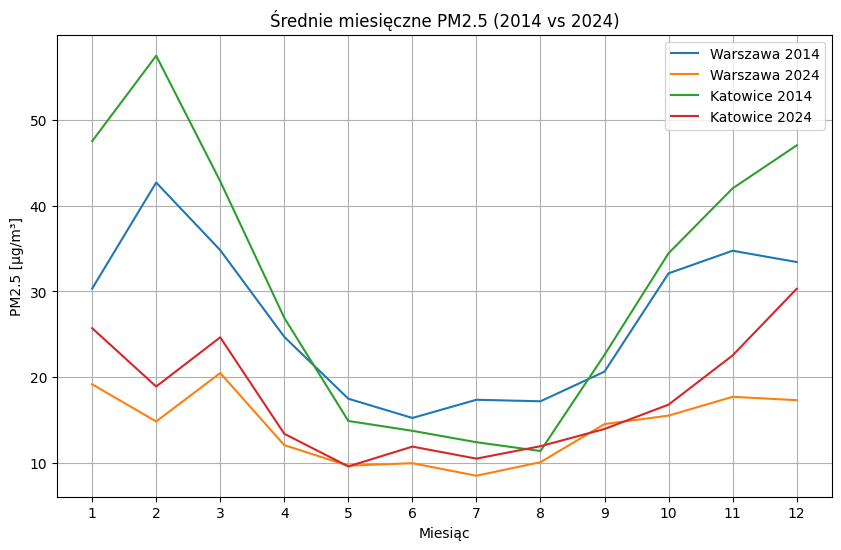

In [93]:
# Rysowanie wykresu porównawczego
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for miasto in ["Warszawa", "Katowice"]:
    for rok in [2014, 2024]:
        dane = chosen_years_data[chosen_years_data["Rok"] == rok]
        plt.plot(dane["Miesiąc"], dane[miasto], label=f"{miasto} {rok}")

plt.title("Średnie miesięczne PM2.5 (2014 vs 2024)")
plt.xlabel("Miesiąc")
plt.ylabel("PM2.5 [µg/m³]")
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)

plt.show()

# Opis różnic i interpretacja wyników
Zarówno w Warszawie, jak i Katowicach widać wyraźny wzrost stężenia PM2.5 w zimowych miesiącach (styczeń-marzec i październik-grudzień). Najniższe stężenia występują latem (maj-sierpień), co wynika z sezonowego korzystania z ogrzewania.

Katowice w 2014 roku mają wyraźnie wyższe stężenia niż Warszawa (zielona linia powyżej niebieskiej), szczególnie zimą.
Natomiast w 2024 roku średnie dla Katowic i Warszawy są do siebie zbliżone, ale Katowice nadal mają lekko wyższe wartości zimą. 
Ogólnie Katowice są bardziej zanieczyszczone PM2.5 niż Warszawa, ale różnica między poziomami zanieczyszczenia zmniejsza się. Przyczny większego zanieczyszczenia powietrza w Katowicach można doszukiwać się większym udziałem, m.in. przemysłu ciężkiego, który emituje zanieczyszczenia.

W 2024 roku średnie stężenia są znacznie niższe niż w 2014 dla obu miast.
Zmniejszenie stężenia PM2.5 w 2024 jest najbardziej widoczne w miesiącach zimowych (styczeń–marzec), co sugeruje poprawę jakości powietrza, prawdopodobnie dzięki efektywnym programom antysmogowym oraz wymianie nieefektywnych źródeł ogrzewania.
Ogólny trend jest pozytywny - średnie miesięczne wartości PM2.5 spadają w obu miastach w ciągu dekady.

## 3. Heatmapa miesięcznych średnich

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

In [94]:
# Zamiana na format długi: kolumny z wartościami na wiersze
city_month_means = city_month_means.reset_index()
df_long = city_month_means.melt(id_vars=['Rok', 'Miesiąc'], var_name='miasto', value_name='PM25')

In [95]:
df_long.head()

,Rok,Miesiąc,miasto,PM25
0,2014,1,Bydgoszcz,30.616434
1,2014,2,Bydgoszcz,51.856173
2,2014,3,Bydgoszcz,40.556041
3,2014,4,Bydgoszcz,19.772776
4,2014,5,Bydgoszcz,11.903410


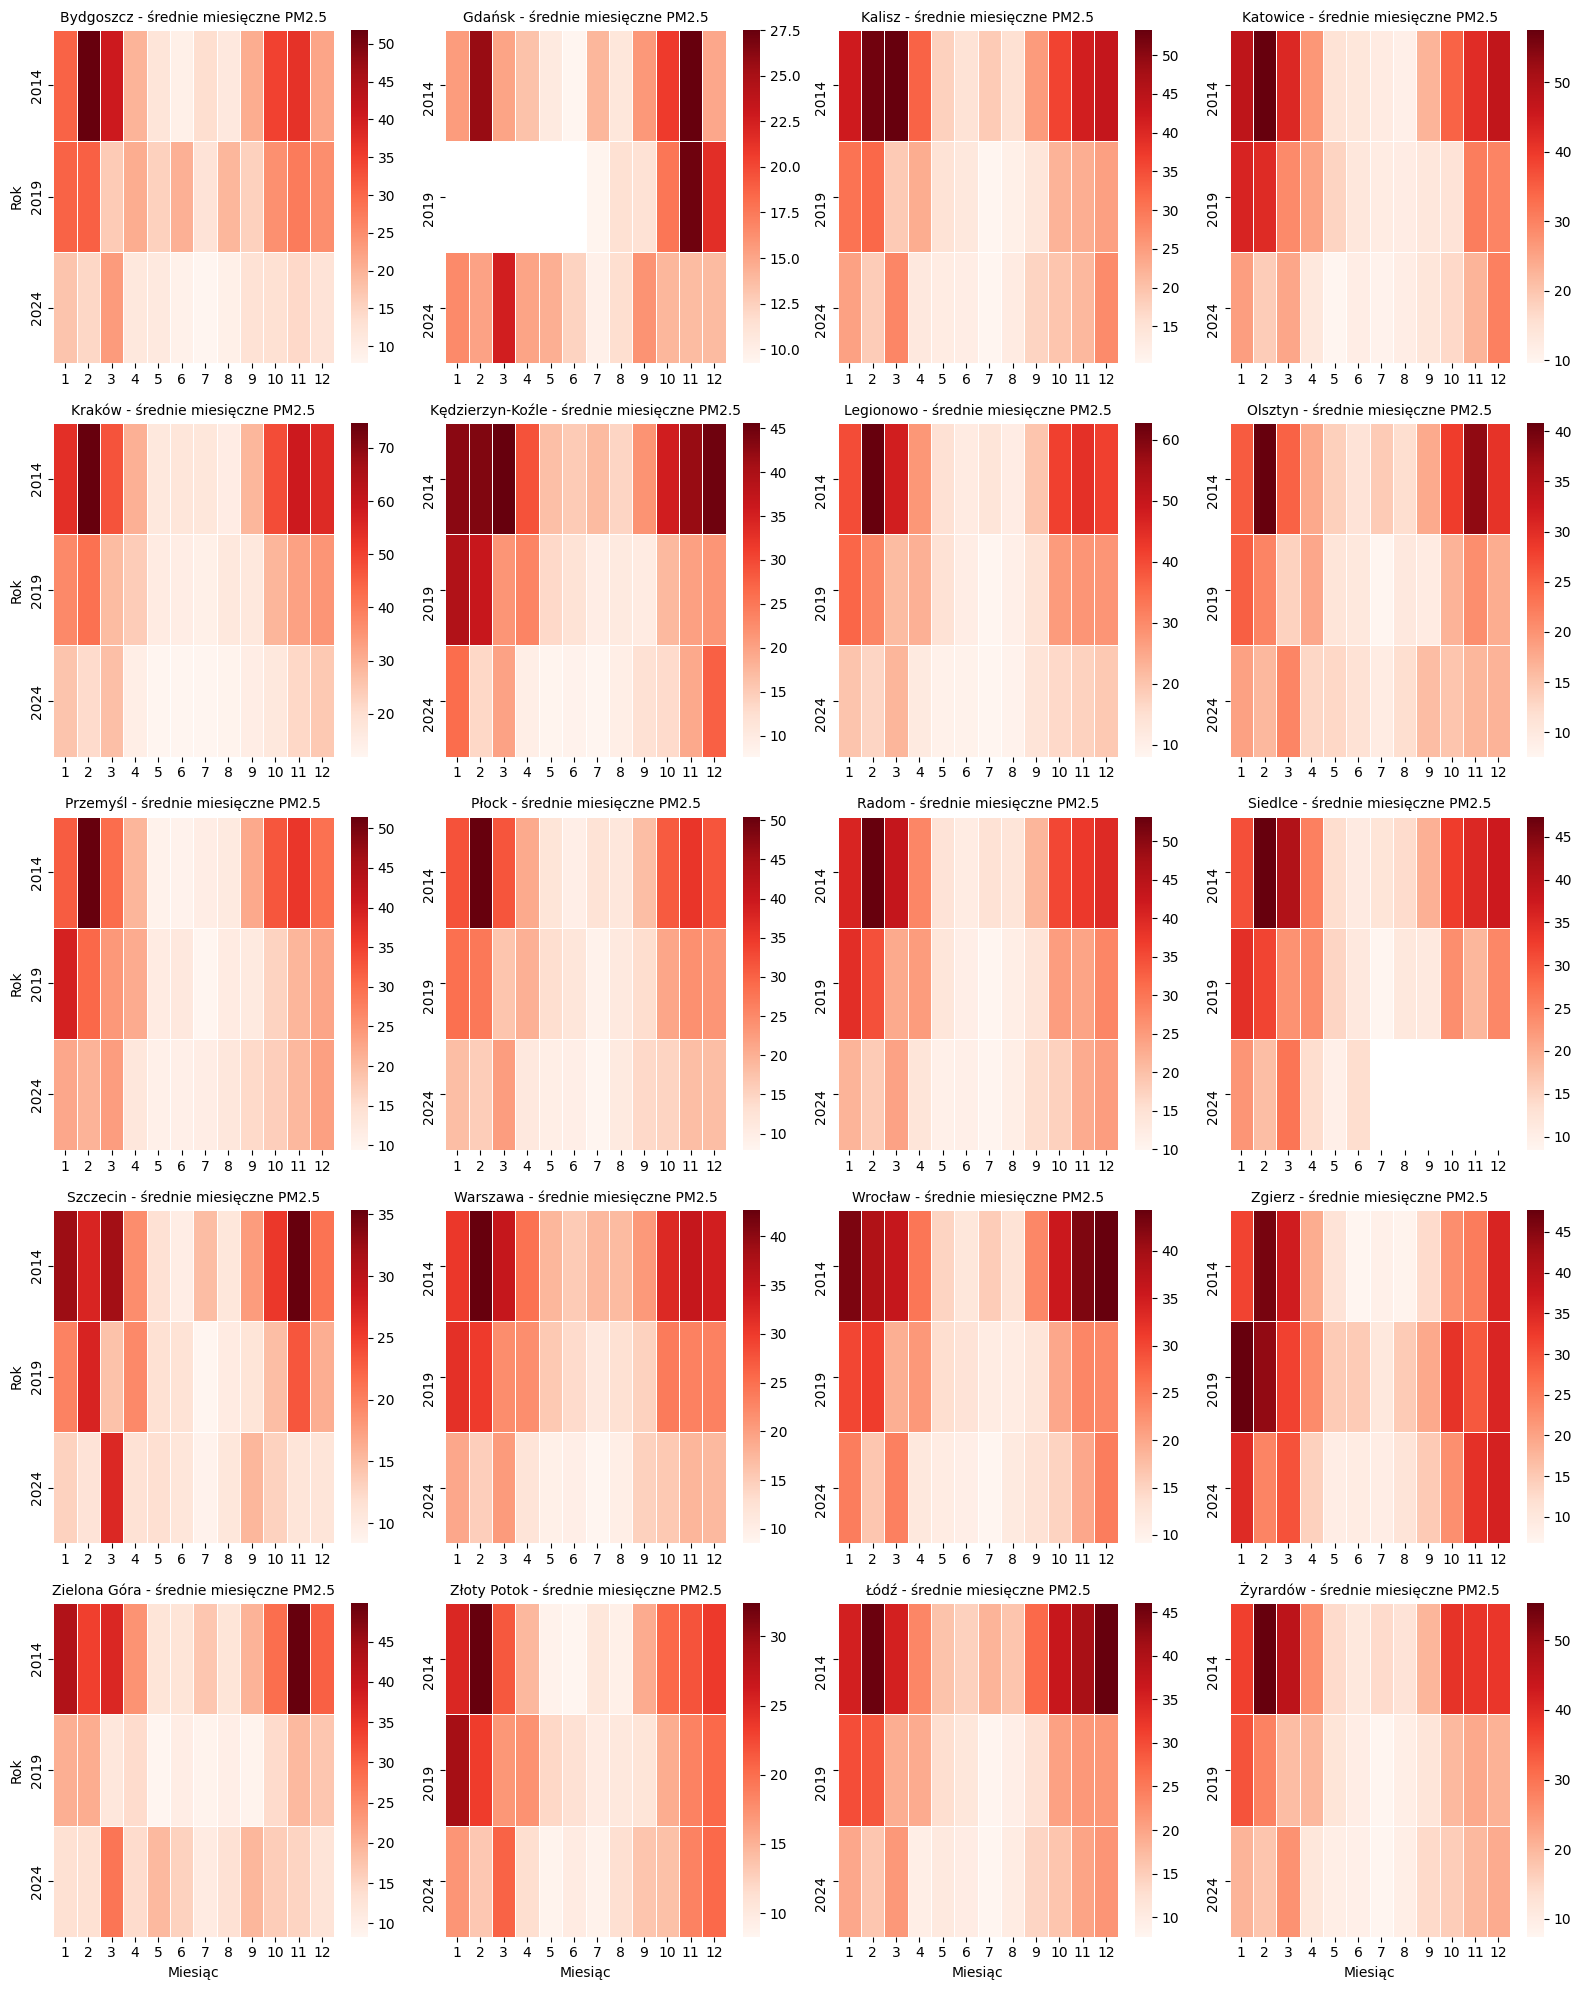

In [96]:
# Rysowanie heatmapy dla każdego miasta
import seaborn as sns

# Facet dla każdego miasta
g = sns.FacetGrid(df_long, col="miasto", col_wrap=4, height=4, sharey=True)
g.map_dataframe(
    lambda data, color: sns.heatmap(
        data.pivot(index="Rok", columns="Miesiąc", values="PM25"), 
        cmap="Reds", 
        cbar=True,
        linewidths=0.5,
    )
)
g.set_titles(col_template="{col_name} - średnie miesięczne PM2.5")
# Ustawienie etykiet
for ax in g.axes.flat:
    ax.set_xlabel("Miesiąc")
    ax.set_ylabel("Rok")

    ax.tick_params(labelbottom=True, labelleft=True)

plt.tight_layout()
plt.show()

# Interpretacja wyników
Na heatmapach widoczna jest wyraźna sezonowość zmian zanieczyszczenia powietrza pyłem PM2.5. Każdego roku największe stężenie PM2.5 było obserwowane w okresie październik-marzec, czego przyczyny można doszukiwać się w okresie grzewczym. Z kolei w miesiącach letnich poziomy PM2.5 są znacznie niższe. 

Widać także, że walka z zanieczyszeniem powietrza jest skuteczna - w kolejnych latach stężenia PM2.5 maleją:</br>
W 2019 roku, w porównaniu do 2014 roku, większość miast odnotowała spadek średniego stężenia w miesiącach październik–grudzień. W 2024 roku tendencja spadkowa obejmuje już niemal wszystkie miesiące jesienno-zimowe, choć wyjątkiem pozostaje Zgierz, gdzie taki efekt nie jest widoczny.</br>

Podsumowując, wyniki pokazują stopniową poprawę jakości powietrza w okresie jesienno-zimowym, przy jednoczesnym utrzymaniu niskiego poziomu PM2.5 latem.
Dodatkowo można zauważyć braki danych pomiarowych: dla Gdańska w okresie styczeń - czerwiec 2019 oraz dla Siedlec w okresie lipiec-grudzień 2024.

## 4. Dni z przekroczeniem normy (WHO)

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2014, 2019, 2024). Dołącz opis i interpretację obserwowanych różnic.

In [97]:
print(combined_df_c["Rok"].unique())

[2014 2019 2024]


In [98]:
# Przygotowanie dataframe'u z datami bez czasu
df = combined_df_c.copy()
df['Dzień'] = df['Data'].dt.date #dzień, czyli data w formacie rok-miesiąc-dzień
df = df.drop(columns=['Data', 'Rok', 'Miesiąc'], errors='ignore')


df.head()

Bydgoszcz       Gdańsk       Kalisz     Katowice       Kraków  \
  KpBydPlPozna PmGdaLeczkow WpKaliSawick SlKatoKossut MpKrakAlKras   
0   116.214424         58.4          NaN        104.0        104.0   
1          NaN         28.5         82.5        107.0        104.0   
2          NaN         27.0         83.0        114.0         91.0   
3          NaN         28.7         73.1        108.0         89.0   
4          NaN         25.7         74.9         88.0         83.0   

               Kędzierzyn-Koźle    Legionowo      Olsztyn     Przemyśl  ...  \
  MpKrakBulwar     OpKKozBSmial MzLegZegrzyn WmOlsPuszkin PkPrzemGrunw  ...   
0         64.0            115.0        44.44    84.121582       48.175  ...   
1         63.0            134.0       103.07    75.444382       33.747  ...   
2         62.0            137.0        74.91    34.427513       30.622  ...   
3         58.0            137.0        39.27    32.742474       28.642  ...   
4         55.0            136.0        26.51    32.714367       27.781  ...   

      Szczecin     Warszawa                   Wrocław       Zgierz  \
  ZpSzczPilsud MzWarAlNiepo MzWarWokalna DsWrocAlWisn LdZgieMielcz   
0        109.0   100.325798        63.49        152.0   119.696114   
1        118.0    69.412430        36.28        137.0    70.337502   
2        120.0    40.967861        30.77        129.0    40.915695   
3        104.0    37.308937        31.69        129.0    37.817917   
4         96.0    38.185955        36.86        105.0    38.814861   

  Zielona Góra  Złoty Potok         Łódź     Żyrardów       Dzień  
  LuZielKrotka SlZlotPotLes LdLodzCzerni MzZyraRoosev              
0          NaN         32.0    81.029259          NaN  2014-01-01  
1          NaN         39.0   210.364670          NaN  2014-01-01  
2          NaN         43.0    66.425789          NaN  2014-01-01  
3          NaN         42.0    53.999668          NaN  2014-01-01  
4          NaN         40.0    52.239670          NaN  2014-01-01  

[5 rows x 24 columns]

In [99]:
# Obliczanie średnich dziennych stężeń na stacje
day_means = df.groupby('Dzień').mean(numeric_only=True).reset_index()
day_means.head()

Dzień    Bydgoszcz       Gdańsk       Kalisz     Katowice  \
              KpBydPlPozna PmGdaLeczkow WpKaliSawick SlKatoKossut   
0  2014-01-01    89.176935    33.366667    64.939130    80.083333   
1  2014-01-02    66.628389    32.491667    55.556522    83.416667   
2  2014-01-03    52.670562    35.204167    54.687500    31.470588   
3  2014-01-04    38.405468    18.383333    37.308333          NaN   
4  2014-01-05    29.585035    26.179167    33.325000          NaN   

        Kraków              Kędzierzyn-Koźle    Legionowo      Olsztyn  ...  \
  MpKrakAlKras MpKrakBulwar     OpKKozBSmial MzLegZegrzyn WmOlsPuszkin  ...   
0    99.208333    66.250000        68.083333    41.190417    37.060279  ...   
1   121.291667    87.000000        35.833333    76.702083    46.957117  ...   
2   142.791667   131.083333        30.904762    61.540417    52.304463  ...   
3   125.541667   103.166667        40.666667    61.118750    39.114470  ...   
4    56.750000    51.583333        30.894737    44.609583    32.901524  ...   

      Szczecin                  Warszawa                   Wrocław  \
  ZpSzczAndrze ZpSzczPilsud MzWarAlNiepo MzWarWokalna DsWrocAlWisn   
0    70.713933    61.333333    42.473250    36.320000    62.041667   
1          NaN    36.833333    53.073164    49.766818    53.086957   
2          NaN    22.208333    58.271953    51.776667    42.652174   
3          NaN    14.000000    51.780756    45.772500    31.047619   
4          NaN    33.916667    40.327532    36.248333    30.142857   

        Zgierz Zielona Góra  Złoty Potok         Łódź     Żyrardów  
  LdZgieMielcz LuZielKrotka SlZlotPotLes LdLodzCzerni MzZyraRoosev  
0    55.446441          NaN    45.208333    65.259924          NaN  
1    44.201764          NaN    42.750000    55.809741    71.486250  
2    43.506713          NaN    31.791667    49.356163    54.382174  
3    32.495752          NaN    33.000000    38.292567    51.499583  
4    42.779161          NaN    23.130435    33.157427    47.155833  

[5 rows x 24 columns]

In [100]:
# Sprawdzanie ile dni w każdym roku przekroczono 15 µg/m^3 dla każdej stacji
day_means = day_means.set_index('Dzień')
mask = day_means > 15
day_means['Rok'] = pd.to_datetime(day_means.index).year

exceeded_results = mask.groupby(day_means['Rok']).sum()
exceeded_results.head()

Bydgoszcz       Gdańsk       Kalisz     Katowice       Kraków  \
     KpBydPlPozna PmGdaLeczkow WpKaliSawick SlKatoKossut MpKrakAlKras   
Rok                                                                     
2014          218          159          292          254          351   
2019          218           71          200          213          291   
2024          108          139          163          165          178   

                  Kędzierzyn-Koźle    Legionowo      Olsztyn     Przemyśl  \
     MpKrakBulwar     OpKKozBSmial MzLegZegrzyn WmOlsPuszkin PkPrzemGrunw   
Rok                                                                         
2014          264              259          250          224          220   
2019          203              174          207          136          182   
2024          152              111          121          139          146   

      ...     Szczecin                  Warszawa                   Wrocław  \
      ... ZpSzczAndrze ZpSzczPilsud MzWarAlNiepo MzWarWokalna DsWrocAlWisn   
Rok   ...                                                                    
2014  ...          175          213          305          238          255   
2019  ...          116          163          299          154          180   
2024  ...           72          130          152          102          134   

           Zgierz Zielona Góra  Złoty Potok         Łódź     Żyrardów  
     LdZgieMielcz LuZielKrotka SlZlotPotLes LdLodzCzerni MzZyraRoosev  
Rok                                                                    
2014          186          218          173          285          256  
2019          244          108          143          183          170  
2024          189          145          117          128          142  

[3 rows x 23 columns]

In [101]:
# Wyciąganie 3 stacji z najmniejszą i największą liczbą dni przekroczeń w 2024 roku
exceed_2024 = exceeded_results.loc[2024]
smallest3 = exceed_2024.nsmallest(3)
largest3 = exceed_2024.nlargest(3)
top_bottom = list(smallest3.index) + list(largest3.index)
print(top_bottom)

[('Szczecin', 'ZpSzczAndrze'), ('Siedlce', 'MzSiedKonars'), ('Warszawa', 'MzWarWokalna'), ('Zgierz', 'LdZgieMielcz'), ('Kraków', 'MpKrakAlKras'), ('Katowice', 'SlKatoKossut')]


In [102]:
# Przygotowanie danych do wykresu
# Transponowanie, żeby stacje na osi X, lata na Y
df_plot = exceeded_results[top_bottom]
df_plot_T = df_plot.T 
df_plot_T

,Rok,2014,2019,2024
Szczecin,ZpSzczAndrze,175,116,72
Siedlce,MzSiedKonars,245,190,79
Warszawa,MzWarWokalna,238,154,102
Zgierz,LdZgieMielcz,186,244,189
Kraków,MpKrakAlKras,351,291,178
Katowice,SlKatoKossut,254,213,165


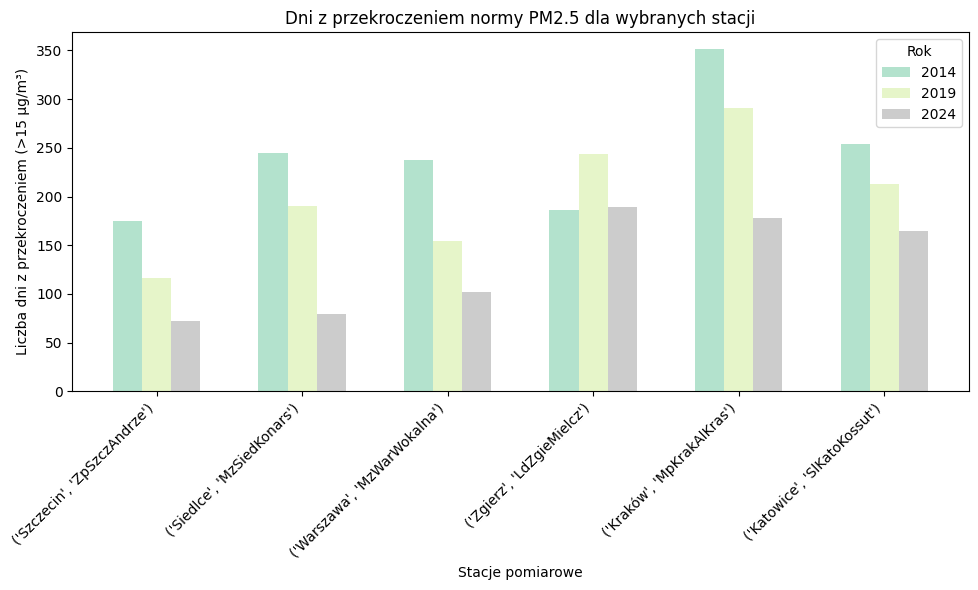

In [ ]:
import numpy as np

# Rysowanie wykresu słupkowego porównującego liczbę dni przekroczeń dla wybranych stacji w różnych latach
years = df_plot_T.columns
stations = df_plot_T.index

x = np.arange(len(stations))  # pozycje na osi X
width = 0.2  # szerokość jednego słupka

fig, ax = plt.subplots(figsize=(10,6))
colors = plt.cm.Pastel2(np.linspace(0, 1, len(years)))

# Rysowanie słupków dla każdego roku
for i, year in enumerate(years):
    ax.bar(x + (i - 1)*width, df_plot_T[year], width, label=year, color=colors[i])  # (i - 1) żeby wyśrodkować

ax.set_xticks(x)
ax.set_xticklabels(stations, rotation=45, ha='right')
ax.set_xlabel("Stacje pomiarowe")
ax.set_ylabel("Liczba dni z przekroczeniem (>15 µg/m³)")
ax.set_title("Dni z przekroczeniem normy PM2.5 dla wybranych stacji")
ax.legend(title="Rok")

plt.tight_layout()
plt.show()


# Opis różnic
U większości stacji widać wyraźny spadek z roku na rok — wyjątkiem jest Zgierz, gdzie poprawy nie ma. Należy również zaznaczyć, że wyniki dla Siedlc z 2024 obejmują jednynie pierwszą połowę roku (dla drugiej brak pomiarów) dlatego nie odzwierciedlają w pełni rzeczywistej sytuacji. Stacje, które dziś znajdują się w grupie o najgorszych wynikach, miały w 2014 roku poziom przekroczeń zbliżony do stacji, które obecnie należą do najczystszych z wyjątkiem stacji z Krakowa. Ta stacja w 2014 roku odnotowywała bardzo wysoki poziom zanieczyszczeń(ok. 350 dni w roku), ale jednocześnie wykazała największą poprawę na przestrzeni lat. Pozostałe dwie stacje z najgorszymi wynikami pokazują dużo wolniejsze tempo spadku lub jego brak.</br>
W 2024: stacje z najgorszymi rezultatami mają ok. 180–190 dni z przekroczeniem norm, a stacje z najlepszymi ok. 70-100 dni.</br> 
Poza stacją w Zgierzu widoczna jest wyraźna tendencja spadkowa z roku na rok.

# Interpretacja wyników
Poprawa powietrza widoczna jest na niemal wszystkich stacjach. Największą poprawę odniosła stacja w Krakowie, co potwierdza skuteczność działań antysmogowych podejmowanych w tym mieście. Mimo tego w 2024r. ta stacja wciąż pozostaje wśród 3 stacji z największą liczbą dni z przekroczeniem norm. Brak poprawy w Zgierzu sugeruje problemy z wdrażaniem tam polityki czystego powietrza. Stacja w Katowicach mimo, że w 2014r. miała poziom zanieczyszczenia porównywalny ze stacjami z obecnie najlepszymi wynikami pozostała w top 3 najgorszych stacji.</br>
Stacje charakteryzujące się najlepszymi wynikami w 2024 roku wykazały stabilny i szybki spadek liczby dni z przekroczeniami - najlepsze wyniki w 2024r. są warunkowane tempem zmian, a nie początkowym stopniem zanieczyszczenia(poza Krakowem).